In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from tqdm import tqdm

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.boston_housing.load_data(path='boston-housing.npz',
                                                                               test_split=0.2, seed=113)

In [3]:
X_train, y_train = (X_train, y_train)
X_test, y_test = (X_test, y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


## Data Normalization

In [4]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

## Model Building

In [5]:
model = models.Sequential(name='BostonHousingPrices')
model.add(layers.Dense(100, input_dim = X_train.shape[1], activation='relu', name='Hidden-1'))
model.add(layers.Dense(100, activation='relu', name='Hidden-2'))
model.add(layers.Dense(1, activation='linear', name='Output'))

## Model Compiling

In [6]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Model Training

In [7]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 512.0120 - mae: 20.6021 - val_loss: 518.4684 - val_mae: 20.6935
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 416.1168 - mae: 17.9619 - val_loss: 410.5899 - val_mae: 17.7708
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 309.5391 - mae: 14.6208 - val_loss: 291.3734 - val_mae: 14.0048
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 209.7487 - mae: 11.2709 - val_loss: 193.9550 - val_mae: 10.9733
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 148.3489 - mae: 9.3398 - val_loss: 145.6204 - val_mae: 9.3827
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 122.1591 - mae: 8.3535 - val_loss: 123.4230 - val_mae: 8.4449
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 104.7502 - mae: 7.6107 - val_loss: 100.4393 - val_mae: 7.6877
Epoch 8/100
11/11 [===========================

11/11 [==============================] - 0s 6ms/step - loss: 16.8948 - mae: 2.8502 - val_loss: 19.3359 - val_mae: 3.1250
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 17.8010 - mae: 2.9301 - val_loss: 18.1375 - val_mae: 2.9968
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 16.8187 - mae: 2.7740 - val_loss: 17.6466 - val_mae: 3.1941
Epoch 65/100
11/11 [==============================] - 0s 6ms/step - loss: 16.7589 - mae: 2.7862 - val_loss: 16.3755 - val_mae: 2.8650
Epoch 66/100
11/11 [==============================] - 0s 5ms/step - loss: 16.8704 - mae: 2.7884 - val_loss: 16.3506 - val_mae: 2.8676
Epoch 67/100
11/11 [==============================] - 0s 4ms/step - loss: 15.8783 - mae: 2.7558 - val_loss: 19.4527 - val_mae: 3.2043
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 16.1088 - mae: 2.7744 - val_loss: 15.4216 - val_mae: 2.8196
Epoch 69/100
11/11 [==============================] - 0s 5ms/step - loss: 1

## Visualize Loss, MAE

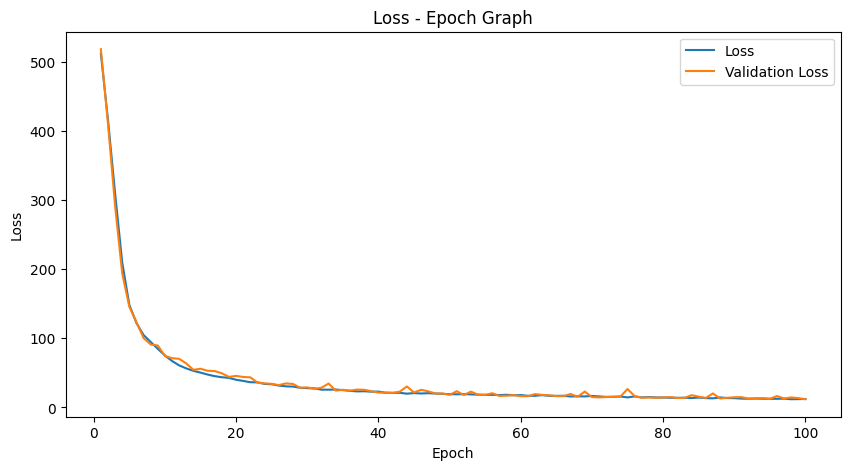

In [18]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Loss - Epoch Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

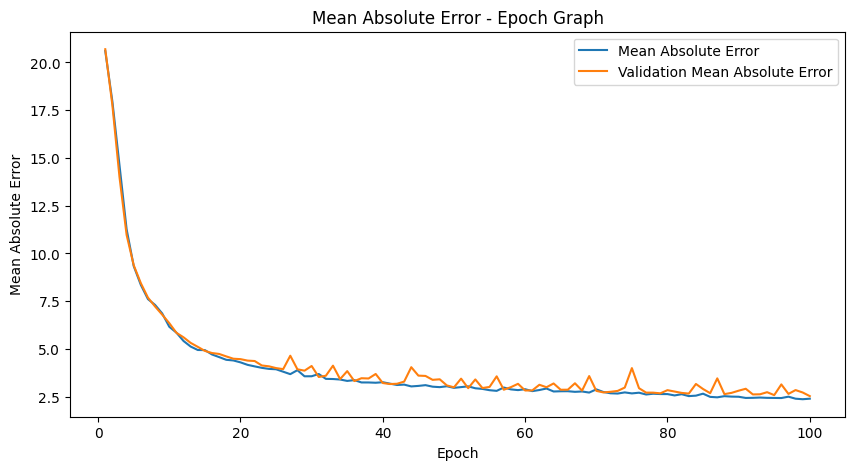

In [17]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Mean Absolute Error - Epoch Graph')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

## Testing Our Model

In [19]:
input_features = np.array([1.05393, 0.00, 8.140, 0, 0.5380, 5.9350, 29.30, 4.4986, 4, 307.0, 21.00, 386.85, 6.58])
input_features = mms.transform(input_features.reshape(1, -1))
prediction = model.predict(input_features)
print(f'predicted value: {prediction[0, 0]:.3f}\n')
print(f'predicted price: {(prediction[0, 0]*1000):.3f}$')

1/1 [==============================] - 0s 24ms/step
predicted value: 21.310

predicted price: 21309.702$


## Saving Our Model

In [20]:
models.save_model(model, 'house_price_predictor.h5')